In [66]:
# Importing Libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")


## Importing data set

In [67]:
student_data = pd.read_csv('student.csv')
print(student_data.head(5))

  STUDENT ID  1  2  3  4  5  6  7  8  9  ...  23  24  25  26  27  28  29  30  \
0   STUDENT1  2  2  3  3  1  2  2  1  1  ...   1   1   3   2   1   2   1   1   
1   STUDENT2  2  2  3  3  1  2  2  1  1  ...   1   1   3   2   3   2   2   3   
2   STUDENT3  2  2  2  3  2  2  2  2  4  ...   1   1   2   2   1   1   2   2   
3   STUDENT4  1  1  1  3  1  2  1  2  1  ...   1   2   3   2   2   1   3   2   
4   STUDENT5  2  2  1  3  2  2  1  3  1  ...   2   1   2   2   2   1   2   2   

   COURSE ID  GRADE  
0          1      1  
1          1      1  
2          1      1  
3          1      1  
4          1      1  

[5 rows x 33 columns]


## Making Descriptive and Target Features

In [68]:
## All columns except StudentID and Grade are descriptive features
descriptive_features = student_data.iloc[:,1:-1]
descriptive_features

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,COURSE ID
0,2,2,3,3,1,2,2,1,1,1,...,1,1,1,3,2,1,2,1,1,1
1,2,2,3,3,1,2,2,1,1,1,...,1,1,1,3,2,3,2,2,3,1
2,2,2,2,3,2,2,2,2,4,2,...,1,1,1,2,2,1,1,2,2,1
3,1,1,1,3,1,2,1,2,1,2,...,1,1,2,3,2,2,1,3,2,1
4,2,2,1,3,2,2,1,3,1,4,...,1,2,1,2,2,2,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2,1,2,3,1,1,2,1,1,2,...,1,1,1,2,1,2,1,3,3,9
141,1,1,2,4,2,2,2,1,4,2,...,2,1,1,3,2,2,1,5,3,9
142,1,1,1,4,2,2,2,1,1,1,...,1,1,1,3,3,2,1,4,3,9
143,2,1,2,4,1,1,1,5,2,3,...,1,2,1,2,1,2,1,5,3,9


In [69]:
# Grade is the Target
target_feature = student_data.iloc[:,-1:]
target_feature

,GRADE
0,1
1,1
2,1
3,1
4,1
...,...
140,5
141,5
142,1
143,4


### Standard Scaler on Descriptive Features

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(descriptive_features))

print(scaler.mean_)

#print(scaler.transform(data))
descriptive_features = scaler.transform(descriptive_features)
descriptive_features

StandardScaler()
[1.62068966 1.6        1.94482759 3.57241379 1.66206897 1.6
 1.57931034 1.62758621 1.62068966 1.73103448 2.28275862 2.63448276
 2.80689655 1.17241379 2.35862069 2.80689655 2.2        1.94482759
 2.0137931  1.2137931  1.20689655 1.24137931 1.33793103 1.16551724
 2.54482759 2.05517241 2.39310345 1.80689655 3.12413793 2.72413793
 4.13103448]


array([[ 0.62076591,  0.81649658,  1.97095572, ..., -1.63825152,
        -1.88766626, -0.96372631],
       [ 0.62076591,  0.81649658,  1.97095572, ..., -0.86699675,
         0.3020266 , -0.96372631],
       [ 0.62076591,  0.81649658,  0.10305651, ..., -0.86699675,
        -0.79281983, -0.96372631],
       ...,
       [-1.01579877, -1.22474487, -1.7648427 , ...,  0.6755128 ,
         0.3020266 ,  1.4986581 ],
       [ 0.62076591, -1.22474487,  0.10305651, ...,  1.44676758,
         0.3020266 ,  1.4986581 ],
       [-1.01579877, -1.22474487, -1.7648427 , ...,  1.44676758,
         1.39687304,  1.4986581 ]])

### Checking shapes of Descriptive and Target features

In [71]:
descriptive_features.shape,target_feature.shape

((145, 31), (145, 1))

## Splitting data in to Training and Test sets to measure accuracy

In [72]:
# Splitting data with 80% Training Data and 20% Test Data
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(descriptive_features, target_feature, test_size=1/5)

In [73]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((116, 31), (29, 31), (116, 1), (29, 1))

## Decision Tree with k-fold validation

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
classifier_DT = DecisionTreeClassifier()
classifier_DT.fit(x_train,y_train)
predicted_values_DT = classifier_DT.predict(x_test)
predicted_values_DT

array([3, 1, 6, 2, 3, 7, 2, 3, 1, 6, 5, 1, 6, 3, 1, 7, 3, 0, 2, 6, 4, 0,
       0, 7, 4, 5, 3, 7, 2])

In [75]:
# Measuring score
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(y_test,predicted_values_DT)
accuracy_score

0.2413793103448276

### Accuracy Score with k_fold cross validator

In [76]:

# Fitting Model
score_DT = cross_val_score(classifier_DT, descriptive_features,target_feature, cv=10)
score_DT.mean()

0.26761904761904765

# SVM 


In [77]:
# Importing Naive Bayes from sklearn 
from sklearn import svm
from sklearn import metrics
## Creating SVM Classifier
classifier_svm = svm.SVC(kernel='linear')
classifier_svm.fit(x_train, y_train)
## Predicting  results
# Predicting the Test set results
predicted_values_svm = classifier_svm.predict(x_test)
predicted_values_svm
## Accuracy Score of model

acc_score = metrics.accuracy_score(y_test,predicted_values_svm)
print('Accuracy:',acc_score)

Accuracy: 0.1724137931034483


### Accuracy Score with k_fold cross validator

In [78]:
score_SVM = cross_val_score(classifier_svm, descriptive_features,target_feature, cv=10)
score_SVM.mean()

0.2119047619047619

# Stochastic Gradient Descent

In [79]:
from sklearn.linear_model import SGDClassifier
classifier_SGD = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
classifier_SGD.fit(x_train,y_train)
predicted_values_SGD = classifier_SGD.predict(x_test)
predicted_values_SGD

array([3, 1, 7, 7, 6, 1, 2, 4, 6, 7, 4, 4, 3, 5, 5, 7, 4, 1, 3, 3, 5, 1,
       2, 2, 2, 2, 5, 6, 6])

In [80]:
# Measuring accuracy score
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test,predicted_values_SGD)
acc_score

0.13793103448275862

### Accuracy Score with k_fold cross validator

In [81]:
score_SGD = cross_val_score(classifier_SGD, descriptive_features,target_feature, cv=10)
score_SGD.mean()

0.19809523809523807

# Random Forest Classifier

In [82]:
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(n_estimators=200)
classifier_RF.fit(x_train,y_train)
predicted_values_RF = classifier_RF.predict(x_test)
predicted_values_RF

array([1, 1, 7, 1, 1, 3, 1, 1, 1, 7, 1, 1, 3, 3, 1, 7, 1, 1, 1, 3, 2, 1,
       2, 7, 6, 1, 1, 7, 1])

In [83]:
# Measuring accuracy score
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test,predicted_values_RF)
acc_score

0.27586206896551724

### Accuracy Score with k_fold cross validator

In [84]:
score_RF = cross_val_score(classifier_RF, descriptive_features,target_feature, cv=10)
score_RF.mean()

0.3252380952380952

### Average Accuracy scores of each classifier

In [85]:
print('Accuracy score of Decision Tree Classifier is: ', score_DT.mean()*100,'%')
print('Accuracy score of SVM is: ',score_SVM.mean()*100, '%')
print('Accuracy score of Stochastic Gradient Descent is: ',score_SGD.mean()*100 ,'%')
print('Accuracy score of Random Forest Classifieris: ', score_RF.mean()*100,'%')

Accuracy score of Decision Tree Classifier is:  26.761904761904766 %
Accuracy score of SVM is:  21.19047619047619 %
Accuracy score of Stochastic Gradient Descent is:  19.809523809523807 %
Accuracy score of Random Forest Classifieris:  32.52380952380952 %


## Getting Important features from Random Forest classifier

In [86]:
importance_RF = classifier_RF.feature_importances_
importance_RF

array([0.03045868, 0.02967987, 0.02120249, 0.04038302, 0.01884883,
       0.0244015 , 0.02418873, 0.02969316, 0.02491633, 0.02997881,
       0.04811098, 0.04263668, 0.04866846, 0.01249813, 0.03020507,
       0.05051363, 0.04514497, 0.02714478, 0.02869343, 0.01405281,
       0.01232078, 0.01433642, 0.02251677, 0.01001778, 0.03143487,
       0.0354124 , 0.02328715, 0.03720981, 0.07258971, 0.0378109 ,
       0.08164307])

Feature: 4, Score: 0.04038
Feature: 11, Score: 0.04811
Feature: 12, Score: 0.04264
Feature: 13, Score: 0.04867
Feature: 16, Score: 0.05051
Feature: 17, Score: 0.04514
Feature: 29, Score: 0.07259
Feature: 31, Score: 0.08164


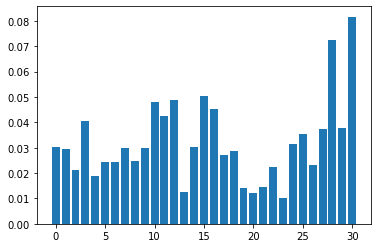

In [87]:
# summarize feature importance
for i,v in enumerate(importance_RF):
    if v>=0.04:  ## Only taking features having importance score > 0.04
	    print('Feature: %0d, Score: %.5f' % (i+1,v))
# plot feature importance
plt.bar([x for x in range(len(importance_RF))], importance_RF)
plt.show()

### Creating new set of Descriptive features (Note: index 31 is Course ID)

In [92]:
descriptive_features__RF_imp = student_data[['4','11','13','16','17','29','COURSE ID']]
descriptive_features__RF_imp


,4,11,13,16,17,29,COURSE ID
0,3,1,3,5,3,1,1
1,3,2,2,1,2,2,1
2,3,2,2,1,2,2,1
3,3,1,5,1,3,3,1
4,3,3,2,4,2,2,1
...,...,...,...,...,...,...,...
140,3,1,2,4,3,3,9
141,4,1,5,1,3,5,9
142,4,3,4,4,2,4,9
143,4,4,1,3,2,5,9


# Random Forest Classifier for important features

In [93]:
from sklearn.ensemble import RandomForestClassifier
classifier_RF_imp = RandomForestClassifier(n_estimators=100)
classifier_RF_imp.fit(descriptive_features__RF_imp,target_feature)
predicted_values_RF_imp = classifier_RF_imp.predict(descriptive_features__RF_imp)
predicted_values_RF_imp

array([1, 1, 1, 1, 1, 2, 5, 2, 5, 0, 2, 0, 0, 1, 2, 2, 1, 1, 2, 3, 1, 1,
       3, 1, 2, 3, 1, 1, 3, 2, 5, 3, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 4,
       1, 3, 5, 3, 1, 2, 1, 4, 1, 4, 3, 3, 5, 4, 3, 5, 2, 5, 3, 5, 3, 2,
       5, 1, 5, 5, 7, 6, 6, 6, 7, 7, 4, 7, 4, 3, 4, 3, 7, 7, 7, 4, 5, 6,
       6, 6, 6, 6, 7, 4, 6, 5, 7, 6, 7, 7, 6, 7, 7, 7, 3, 7, 7, 6, 6, 7,
       2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 0, 2, 1, 3, 2, 3, 1, 0, 3, 3, 4,
       3, 3, 1, 2, 0, 2, 0, 0, 5, 5, 1, 4, 3])

In [94]:
# Measuring accuracy score
from sklearn.metrics import accuracy_score
acc_score_imp = accuracy_score(target_feature,predicted_values_RF_imp)
print("Accuracy Score of Random Forest classifier for selected columns is :", acc_score_imp*100,'%' )

Accuracy Score of Random Forest classifier for selected columns is : 96.55172413793103 %


In [91]:
# ## running on whole data set and then k-fold
# from sklearn.ensemble import RandomForestClassifier
# classifier_RF_full = RandomForestClassifier(n_estimators=100)
# classifier_RF_full.fit(descriptive_features,target_feature)
# predicted_values_RF_full = classifier_RF_full.predict(descriptive_features)
# predicted_values_RF_full
# # Measuring accuracy score
# from sklearn.metrics import accuracy_score
# acc_score = accuracy_score(target_feature,predicted_values_RF_full)
# acc_score
# score_RF_full = cross_val_score(classifier_RF_full, descriptive_features,target_feature, cv=10)
# score_RF_full.mean()